The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys

sys.path += ["../../../easyXRD"]

import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
from copy import deepcopy

# importing matplotlib for plots.
%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True


CPU times: user 390 ms, sys: 10 ms, total: 400 ms
Wall time: 397 ms


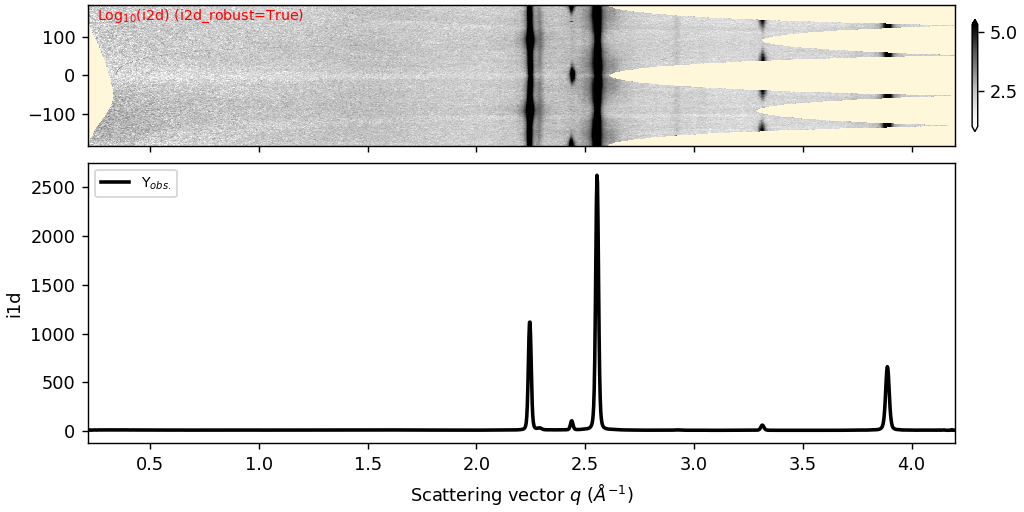

In [29]:
%%time

import pyFAI, fabio

ai_file = "tiff_files/_calibration.poni"
mask_file = "tiff_files/_mask.edf"
ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file="nc_files/Blank.nc", plot=False)


sample_LaB6 = exrd()
# with xr.open_dataset('nc_files/LaB6.nc') as ds:
#     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/LaB6.nc", plot=False)

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file="nc_files/Pt.nc", plot=False)

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file="nc_files/DAHL.nc", plot=False)

sample_Dogbone = exrd(verbose=False)
sample_Dogbone.i1d_ylogscale =False
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file="nc_files/Dogbone.nc", plot=True)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_Pt = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]


phases_Zr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_ZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

# LaB6


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 5.191/0.081 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 5.143/0.081 on 21 variable(s) (was 5.191(-0.94%)/0.081(-0.10%❗))


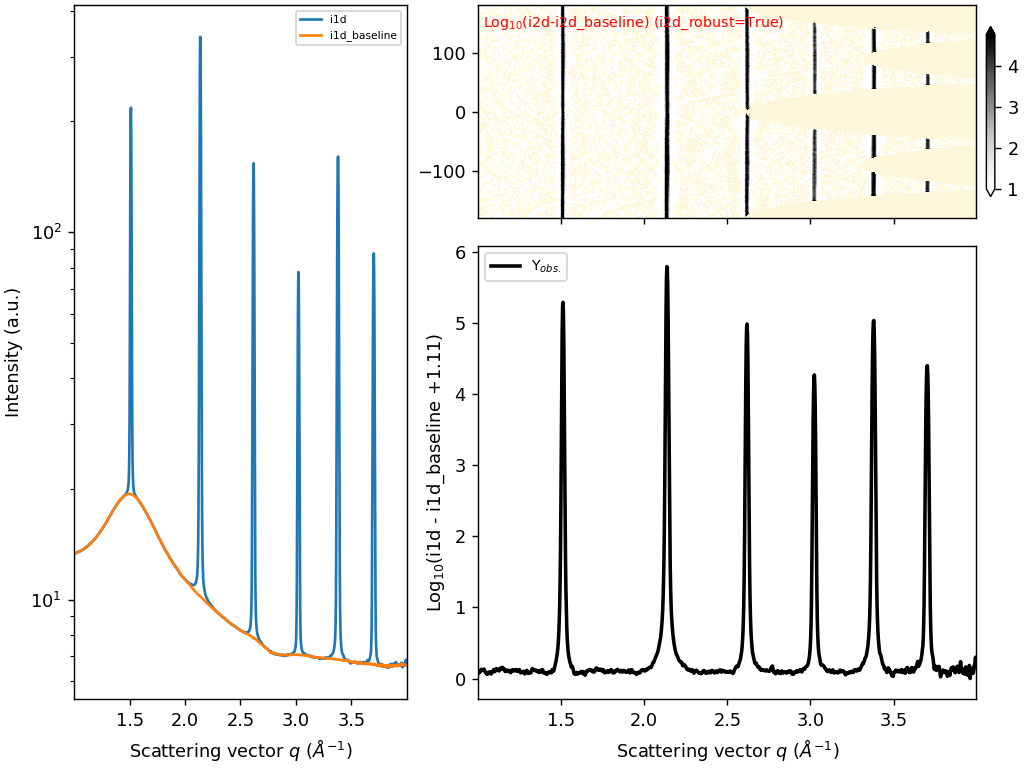

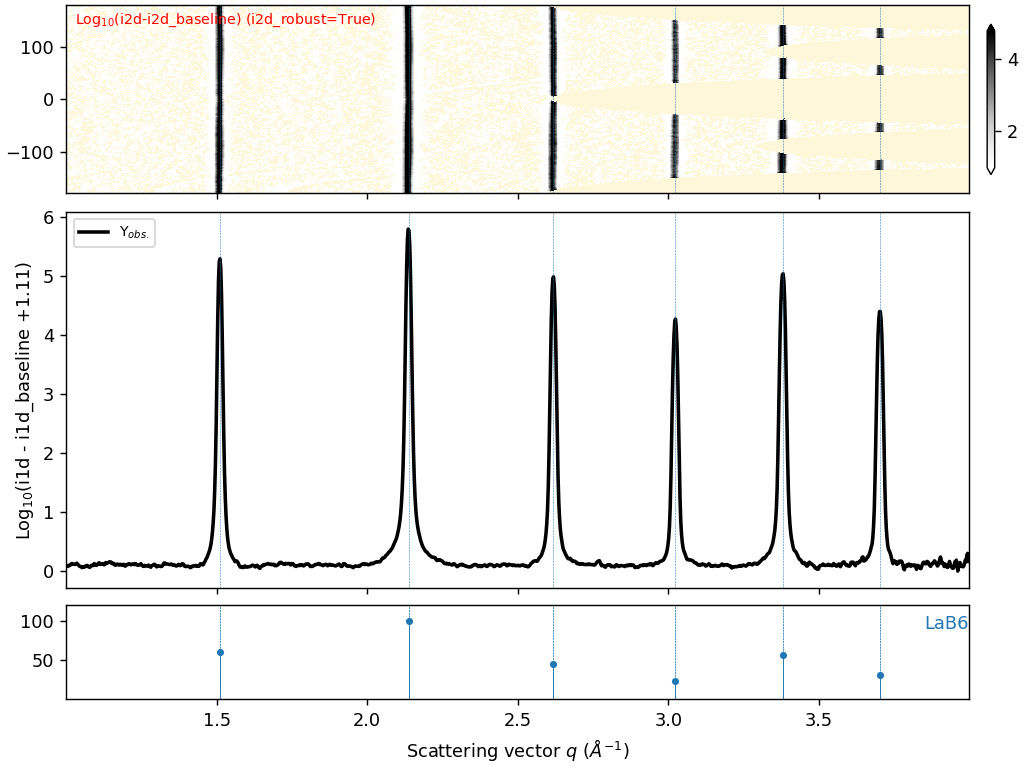

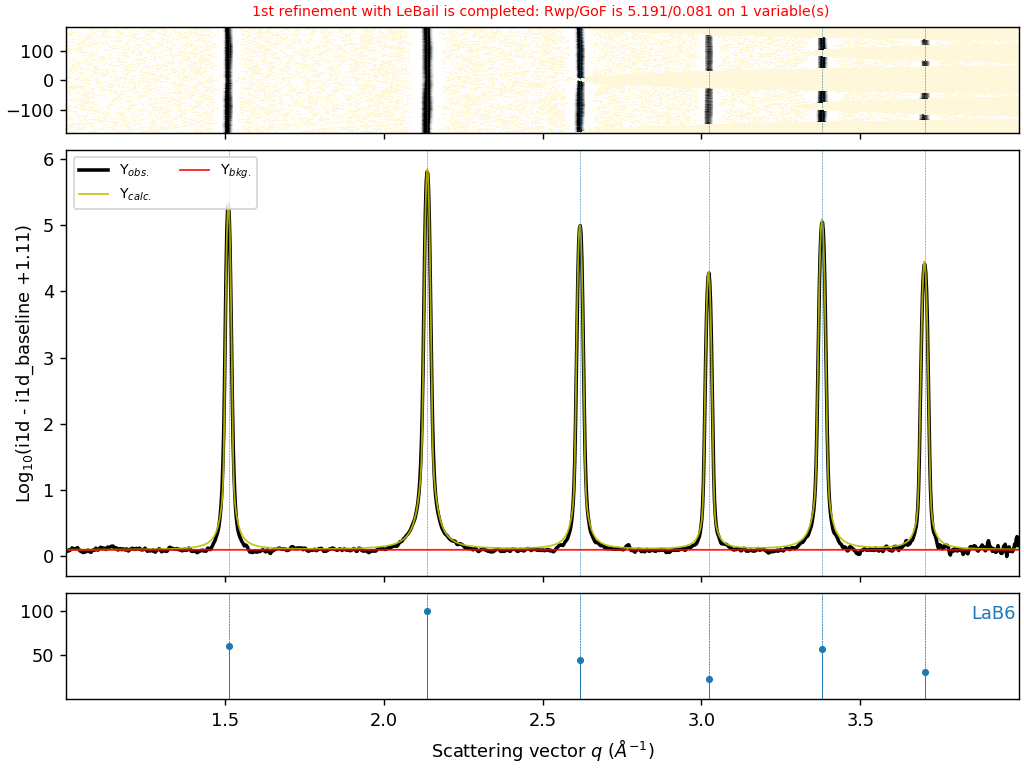

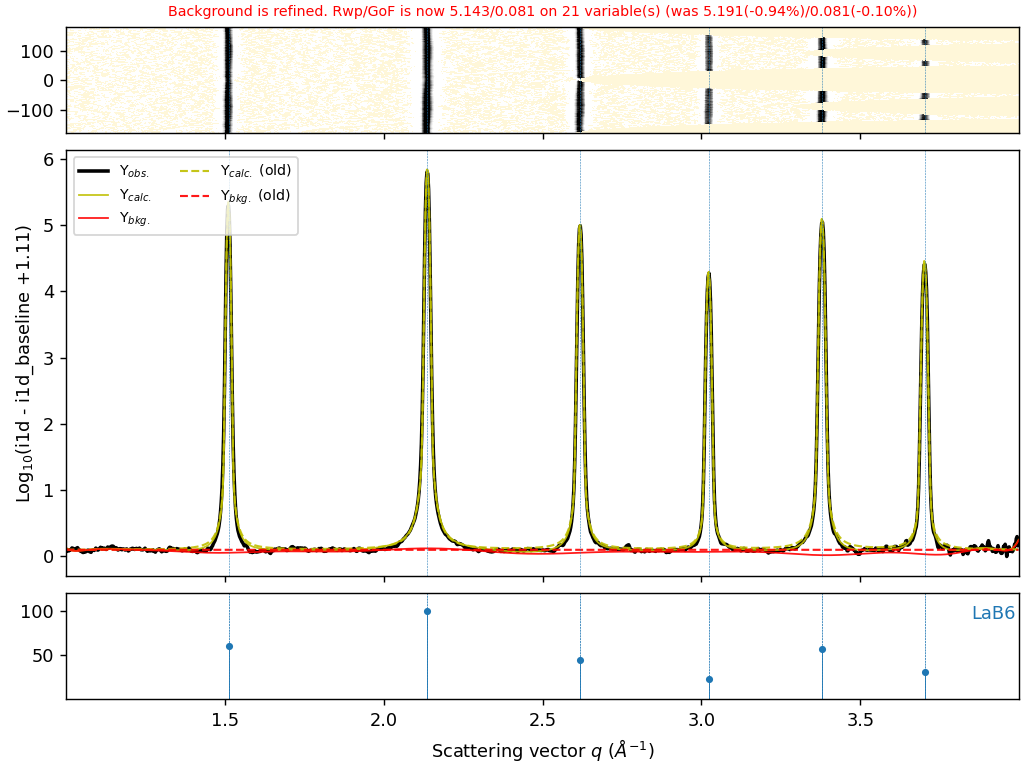

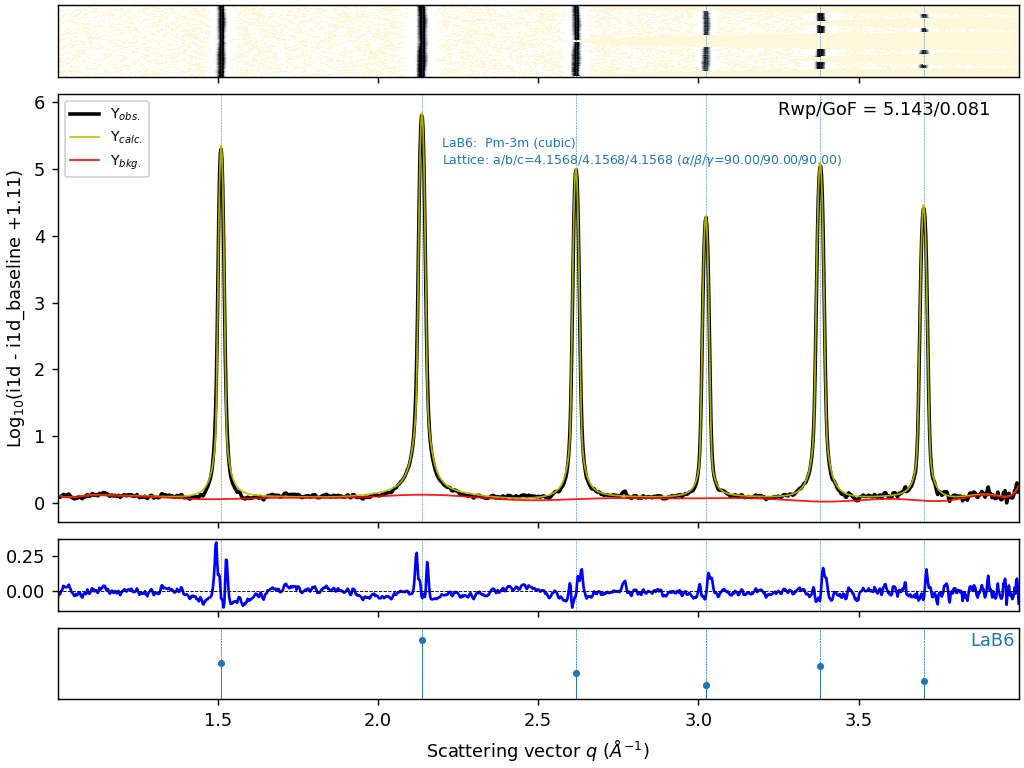

In [30]:
sample = deepcopy(sample_LaB6)

sample.get_baseline(
    input_bkg=deepcopy(sample_Blank),
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = True,
    use_i2d_baseline = False,
    roi_radial_range=[1, 4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)

sample.load_phases(phases=phases_LaB6, plot=True)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=True,
    normalize=True,
    )

sample.refine_background(num_coeffs=20,plot=True)
sample.plot()

# Pt


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 22.869/0.329 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 22.811/0.329 on 2 variable(s) (was 22.869(-0.25%)/0.329(-0.19%❗))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 11.907/0.172 on 2 variable(s) (was 22.811(-47.80%)/0.329(-47.80%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 5.274/0.076 on 2 variable(s) (was 11.907(-55.70%)/0.172(-55.70%✨))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 5.274/0.076 on 2 variable(s) (was 5.274(-0.01%)/0.076(-0.01%❗))
 ✅--Background is refined. Rwp/GoF is now 4.637/0.067 on 2 variable(s) (was 5.274(-12.08%)/0.076(-12.08%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 4.661/0.067 on 2 variable(s) (was 4.637(0.52%)/0.067(0.52%❗))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 4.616/0.067 on 2 variable(s) (was 4.661(-0.96%)/0.067(-0.96%❗))
 ✅--Size broadening of all phases are refined. Rwp/GoF i

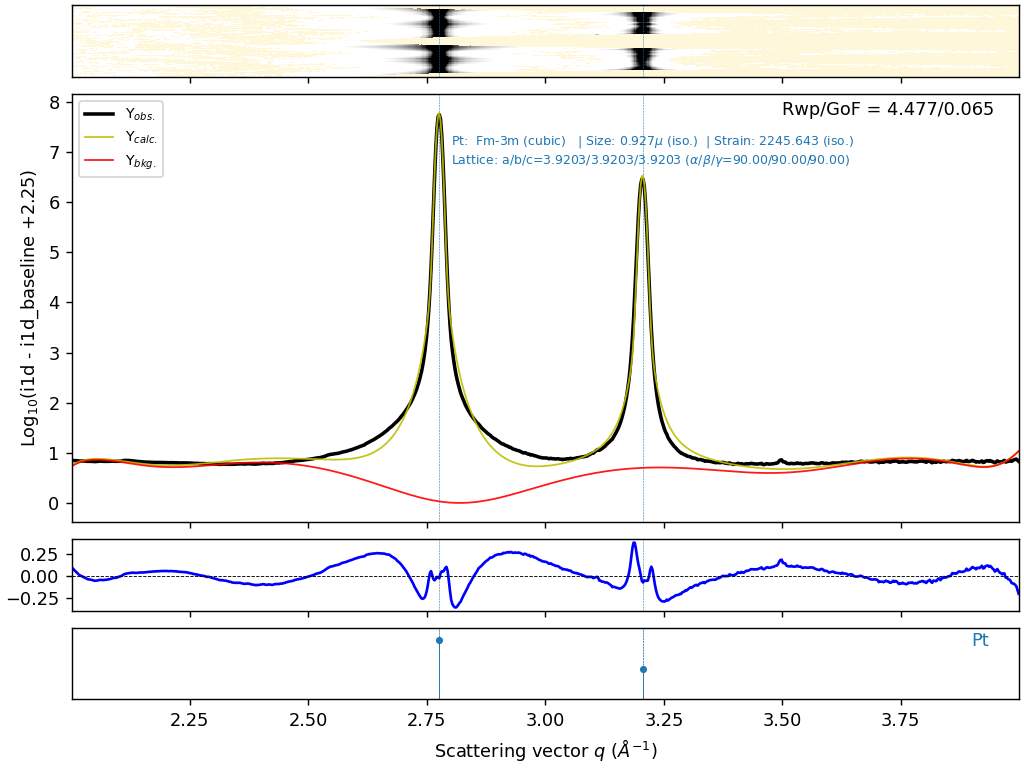

In [51]:
%%time

sample = deepcopy(sample_Pt)

sample.get_baseline(
    input_bkg=deepcopy(sample_Blank),
    arpls_lam=1e7,
    use_arpls=True,
    get_i2d_baseline = True,
    use_i2d_baseline = True,
    roi_radial_range=[2, 4],
    plot=False,
)
sample.load_phases(phases=phases_Pt, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=False,
    )

sample.refine_background(num_coeffs=1, plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_strain_broadening(plot=False)
sample.refine_size_broadening(plot=False)

sample.refine_background(num_coeffs=1, plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_strain_broadening(plot=False)
sample.refine_size_broadening(plot=False)

sample.refine_background(num_coeffs=10, plot=False)


sample.plot()

# DAHL


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 36.665/0.605 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 34.621/0.574 on 11 variable(s) (was 36.665(-5.57%)/0.605(-5.13%))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 31.970/0.528 on 4 variable(s) (was 34.621(-7.66%)/0.574(-7.96%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 17.036/0.281 on 3 variable(s) (was 31.970(-46.71%)/0.528(-46.74%✨))
 ✅--Background is refined. Rwp/GoF is now 12.704/0.211 on 11 variable(s) (was 17.036(-25.43%)/0.281(-25.15%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 10.084/0.167 on 4 variable(s) (was 12.704(-20.62%)/0.211(-20.88%✨))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 8.948/0.148 on 3 variable(s) (was 10.084(-11.27%)/0.167(-11.31%✨))
 ✅--Background is refined. Rwp/GoF is now 8.427/0.140 on 11 variable(s) (was 8.948(-5.82%)/0.148(-5.47%))
CPU times: user 2.82 s, sys: 29.9 ms, total: 2.85 s
Wall time: 3.01 s


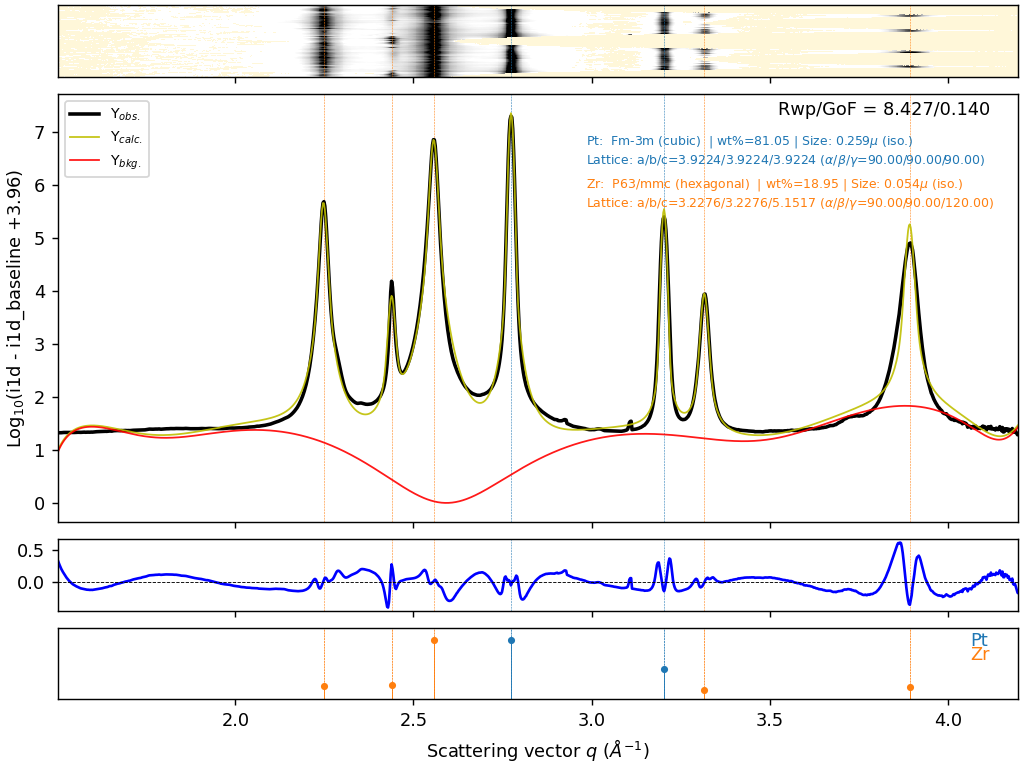

In [53]:
%%time

sample = deepcopy(sample_DAHL)

sample.get_baseline(
    input_bkg=deepcopy(sample_Blank),
    arpls_lam=1e7,
    use_arpls=True,
    get_i2d_baseline = True,
    use_i2d_baseline = True,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_PtZr, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=False,
    normalize=True,
    )

sample.refine_background(num_coeffs=10,plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_size_broadening(plot=False)


sample.refine_background(num_coeffs=10,plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_size_broadening(plot=False)

sample.refine_background(num_coeffs=10,plot=False)


sample.plot(site_str_x=0.55)

# Dogbone


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 21.704/0.323 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 21.275/0.319 on 11 variable(s) (was 21.704(-1.97%)/0.323(-1.51%))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 20.399/0.304 on 4 variable(s) (was 21.275(-4.12%)/0.319(-4.44%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 10.945/0.163 on 3 variable(s) (was 20.399(-46.34%)/0.304(-46.37%✨))
 ✅--Background is refined. Rwp/GoF is now 8.082/0.121 on 11 variable(s) (was 10.945(-26.16%)/0.163(-25.88%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 7.769/0.116 on 4 variable(s) (was 8.082(-3.87%)/0.121(-4.18%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 7.231/0.108 on 3 variable(s) (was 7.769(-6.93%)/0.116(-6.97%))
 ✅--Background is refined. Rwp/GoF is now 7.131/0.107 on 11 variable(s) (was 7.231(-1.38%)/0.108(-1.01%))
CPU times: user 2.73 s, sys: 24 ms, total: 2.76 s
Wall time: 2.92 s


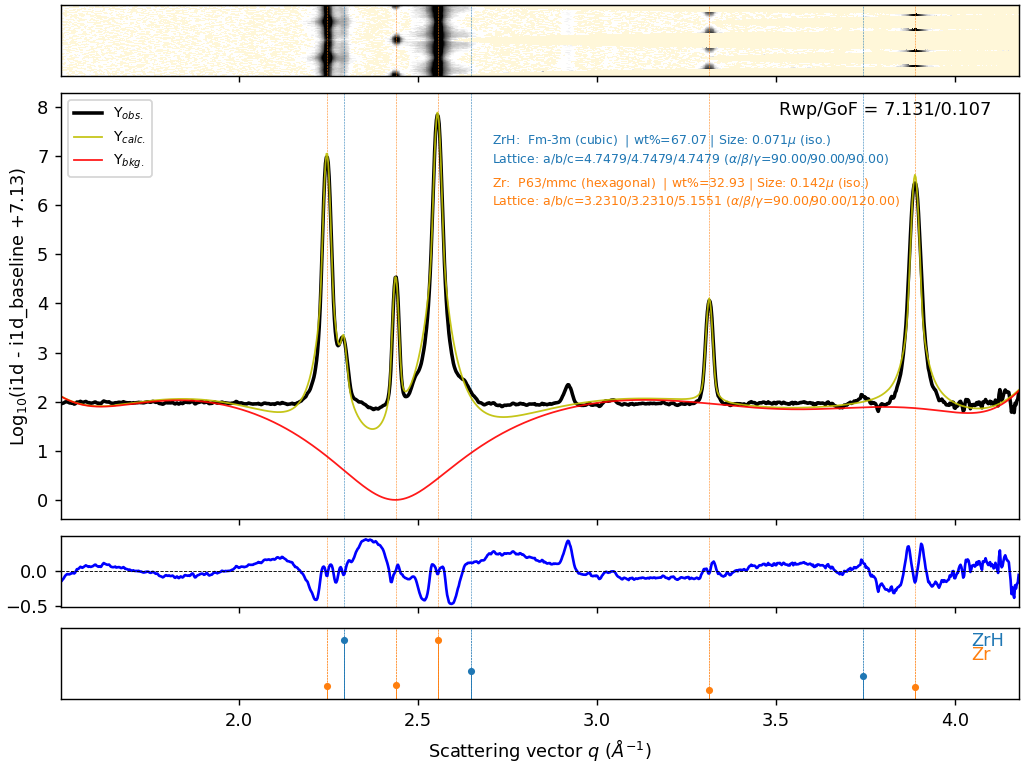

In [62]:
%%time

sample = deepcopy(sample_Dogbone)

sample.i1d_ylogscale = True

sample.get_baseline(
    input_bkg=deepcopy(sample_Blank),
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = True,
    use_i2d_baseline = True,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_ZrZrH, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=False,
    normalize=True,
    )


sample.refine_background(num_coeffs=10,plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_size_broadening(plot=False)


sample.refine_background(num_coeffs=10,plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_size_broadening(plot=False)

sample.refine_background(num_coeffs=10,plot=False)


sample.plot(site_str_x=0.45)
